In [4]:
!pip install pandas scikit-learn

  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 2.4 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 2.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 1.6 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [71]:
!pip install matplotlib

In [73]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=load_iris()

In [24]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["species"] = data.target

In [31]:
print(df.head(5))
x=df[data.feature_names]
y=df["species"]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [30]:
df["species"].value_counts()/float(len(df))

species
0    0.333333
1    0.333333
2    0.333333
Name: count, dtype: float64

In [37]:
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.3,random_state=2)

In [38]:
model=RandomForestClassifier(random_state=2)

In [39]:
model.fit(train_x,train_y)
prediction = model.predict(val_x)

In [76]:
print(f"\n\nAccuracy: {accuracy_score(prediction,val_y)*100}")
print(f"\n\nConfusion Matrix :{confusion_matrix(prediction,val_y)}")
cm=confusion_matrix(prediction,val_y)
print("\n\nclassification_report")
print("\n",classification_report(val_y,prediction))



Accuracy: 97.77777777777777


Confusion Matrix :[[17  0  0]
 [ 0 14  0]
 [ 0  1 13]]


classification_report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



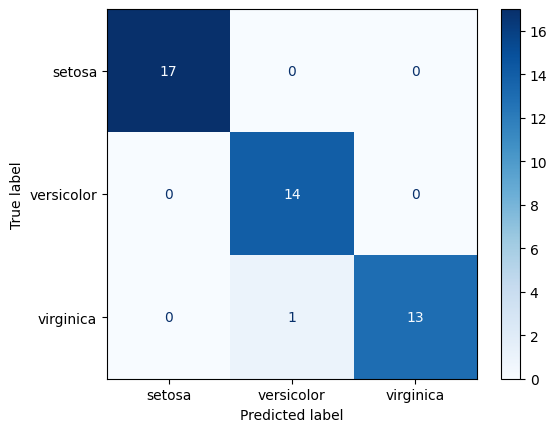

In [74]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.show()